### Import necessary libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

###  Data Mining

#### Data Source : https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset
        

#### Read input Data

In [2]:
path1 = r"D:\Gender_Classification NN"

#### Classifying the data according to Gender

In [3]:
CATEGORIES =['female', 'male']

#### Creating a loop to combine the images as the images are stored in two different files i.e. female and male

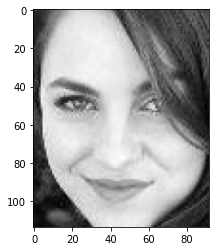

In [4]:
for category in CATEGORIES:
    path = os.path.join(path1,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break     

#### Resizing images as all images are of different size/pixels.

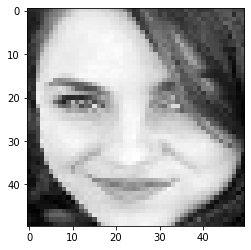

In [5]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


we can see that the picture is blured i.e. the pixels are reduced thus affecting image quality.

#### Creating a user defined function to make 'train data'

In [6]:
train_data = []
def create_train_data():
    for category in CATEGORIES:
        path = os.path.join(path1,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                train_data.append([new_array,class_num])
            except Exception as e:
                pass

create_train_data() 

In [7]:
print(len(train_data))


47009


It implies we have 47009 images in our dataset

### We need to select the images randomly or shuffle them in order to avoid biasness in our model

In [8]:
import random
random.shuffle(train_data)

#### Splitting the data into features and labels

In [9]:

X =[]
Y =[]

for features, label in train_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    
Y = np.array(Y) 


#### Sampling of the data into train and test dataset

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size =.2)

X_train =X_train/255
X_test = X_test/255

X_train.shape

X_test.shape

(9402, 50, 50, 1)

In [11]:
X_train.shape

(37607, 50, 50, 1)

We can see that out of a toal of 47009 images, 37607 images in the train data and 9402 images are part of the test data

In [12]:
Y_test.shape

(9402,)

#### importing the neccesary libraries/modules for performing CV

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from tensorflow.keras.utils import to_categorical 

### Compiling the model

In [14]:
model = Sequential()

model.add(Conv2D(filters = 14 , kernel_size = (7,7) , activation ='relu' , padding='same'))
model.add(MaxPool2D(pool_size=(2 , 2)))
model.add(Flatten())

model.add(Dense(128 , activation='relu'))
model.add(Dense(2 , activation='softmax'))

model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])

model1 = model.fit(X_train , Y_train ,epochs=5 , validation_split= .2 ,batch_size  = 256)

Epoch 1/5
118/118 [==============================] - 46s 354ms/step - loss: 0.5609 - accuracy: 0.7198 - val_loss: 0.3753 - val_accuracy: 0.8511
Epoch 2/5
118/118 [==============================] - 43s 367ms/step - loss: 0.3270 - accuracy: 0.8714 - val_loss: 0.3130 - val_accuracy: 0.8733
Epoch 3/5
118/118 [==============================] - 37s 310ms/step - loss: 0.2713 - accuracy: 0.8953 - val_loss: 0.2612 - val_accuracy: 0.9000
Epoch 4/5
118/118 [==============================] - 35s 298ms/step - loss: 0.2432 - accuracy: 0.9080 - val_loss: 0.2329 - val_accuracy: 0.9077
Epoch 5/5
118/118 [==============================] - 41s 350ms/step - loss: 0.2189 - accuracy: 0.9170 - val_loss: 0.2193 - val_accuracy: 0.9140


### Predictive Analysis

In [15]:
pred_values = model.predict(X_test)
pred_classes = np.argmax(pred_values, axis =1)
pred_classes

294/294 [==============================] - 5s 17ms/step


array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [16]:
print(img_array.shape)

(114, 92)


#### Building the confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test , pred_classes)

array([[4300,  391],
       [ 401, 4310]], dtype=int64)

#### Checking the accuracy score of the model

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test , pred_classes)*100

91.57626037013401

We can see that the accuracy is high and is suitable for the classification purpose

#### Building the classification report to evaluate the performance of the model

In [19]:
from sklearn.metrics import classification_report

print(classification_report(pred_classes, Y_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4701
           1       0.91      0.92      0.92      4701

    accuracy                           0.92      9402
   macro avg       0.92      0.92      0.92      9402
weighted avg       0.92      0.92      0.92      9402



We have a high precision score. Higher precision means that an algorithm returns more relevant results than irrelevant ones

Similarly, we have a high recall score. Models need high recall when you need output-sensitive predictions.

#### Saving the above model

In [20]:
model.save('Gender_classification.h5')